<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
#Variable to store file name: file_name
file_name = "sat_scores.csv"

#Initiates empty list to later append sat raw data to: sat_rdata
sat_rdata = []

#Imports data from file
with open(file_name, 'r') as file:
    lines = csv.reader(file, delimiter = ',')
    for line in lines:
        sat_rdata.append(line)

#SAT headers
sat_headers = sat_rdata[0]
#SAT data
sat_data = sat_rdata[1:]

pprint.pprint(sat_data)

[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

<font color = "red">

<b>Method 1</b>

<br></br>
<br></br>

In this attempt the values of the header have been manually inputted into the nested dictionary. This poses a scalability issue as a data set with 100 column headers would have to be manually inputted into the hard code.

</font>

In [5]:
#Initiates empty dictionary to sat data: dict_data
dict_data = {}


for row in sat_data:
    dict_data[row[0]] = {'Rate' : row[1],
                         'Verbal' : row[2],
                         'Math' : row[3],
                        }
    
dict(list(dict_data.items())[0:5])

{'CT': {'Math': '510', 'Rate': '82', 'Verbal': '509'},
 'MA': {'Math': '515', 'Rate': '79', 'Verbal': '511'},
 'NH': {'Math': '516', 'Rate': '72', 'Verbal': '520'},
 'NJ': {'Math': '513', 'Rate': '81', 'Verbal': '499'},
 'NY': {'Math': '505', 'Rate': '77', 'Verbal': '495'}}

<font color = "red">

<b>Method 2</b>

<br></br>
<br></br>

Below uses a nested dictionary comprehensions to first create the keys of the outer dictionary as states. Before creating a K:V pair for the inner dictionary for subjects:score. This method allows for scalability if additional rows are created into the dataset.
 
<br></br>
<br></br>

For the record Srikanta. Method 1 took me 5 minutes, while method 2 took me 45. Which is why I stay far away from comprehensions.

</font>

In [6]:
# Nested dict comprehension to create a dict of states with values in a nested dict that has subject:score k:v pairs

dict_data = {row[0]:{sat_headers[i]:row[i] for i in range(1,len(sat_headers))}
             for row in sat_data}

dict(list(dict_data.items())[0:5])

{'CT': {'Math': '510', 'Rate': '82', 'Verbal': '509'},
 'MA': {'Math': '515', 'Rate': '79', 'Verbal': '511'},
 'NH': {'Math': '516', 'Rate': '72', 'Verbal': '520'},
 'NJ': {'Math': '513', 'Rate': '81', 'Verbal': '499'},
 'NY': {'Math': '505', 'Rate': '77', 'Verbal': '495'}}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [7]:
#Creates a DataFrame from importing csv: sat_fromcsv
sat_fromcsv = pd.DataFrame(dict_data).T

#Prints the first 3 rows of DataFrame and the types of data
print("First 3 rows of sat_fromcsv DataFrame\n")
print(sat_fromcsv.head(3))

print("----------------------------------")
print("Data Types of sat_fromcsv DataFrame\n")

print(sat_fromcsv.dtypes)

First 3 rows of sat_fromcsv DataFrame

   Math Rate Verbal
AK  510   51    514
AL  554    9    559
AR  550    6    562
----------------------------------
Data Types of sat_fromcsv DataFrame

Math      object
Rate      object
Verbal    object
dtype: object


In [8]:
#Variable to store file name: file_name
file_name = "sat_scores.csv"

#Imports data as DataFrame using pd.read_csv: sat_frompd
with open(file_name, 'r') as file:
    sat_frompd = pd.read_csv(file_name, index_col = 0)
    
print("----------------------------------")
print("Data Types of sat_frompd DataFrame\n")
print(sat_frompd.dtypes)

----------------------------------
Data Types of sat_frompd DataFrame

Rate      int64
Verbal    int64
Math      int64
dtype: object


<font color = "red">
**Comparison**

<br></br>

When the data is passed through a dictionary before being converted into a DataFrame, the types of each column get converted into the type "object", whereas if data is converted using pd.read_csv(), the types are by default the most efficient which in this case are "int".

</font>

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

<font color = "red">
**Data Details**

<br></br>

As later described in the data dictionary, The SAT data represents an aggregate of scores for each US state for the subjects 
Maths and Verbal. An additional column labeled "Rate" represents the rate of participation of all students for that state.

</font>

In [9]:
#Prints the first 5 rows of the data
print(sat_frompd.head(10))

       Rate  Verbal  Math
State                    
CT       82     509   510
NJ       81     499   513
MA       79     511   515
NY       77     495   505
NH       72     520   516
RI       71     501   499
PA       71     500   499
VT       69     511   506
ME       69     506   500
VA       68     510   501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

### <font color = "red">SAT SCORES</font>

<br></br>

<font color = "red">The SAT dataset contains numeric data for the 50 states for the 'Maths' and 'Verbal' portions of the SAT test as well as the rate of participation of each state. The data also contains an additional row 'All' which includes the data from the two additional territories not included. The tests scores are the mean score of all students that participated within that state for the given year. The scores range from 200 (lowest) - 800 (highest).

<br></br>
<br></br>

The Dataset is contained in the shape of (52,3), 52 rows and 3 columns.</font>

Variable|Description|Label|
:--|:--|:--|
1|Rate of SAT participation within given state (0-100)|Rate|
2|Average Math score of SAT participants within given state (200-800)|Math|
3|Average Verbal score of SAT participants within given state (200-800)|Verbal|
4|State of America|State|


In [10]:
#Displays the shape of the dataset
sat_frompd.shape

(52, 3)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

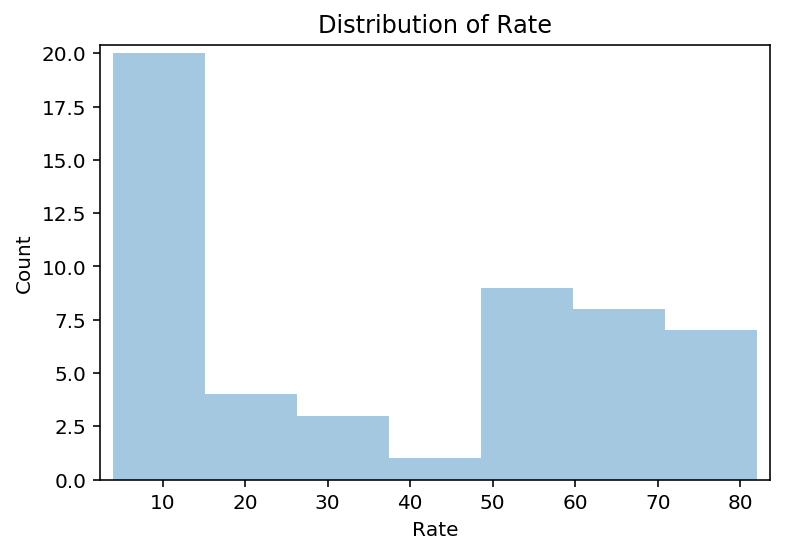

-----------------------------------------------------------------


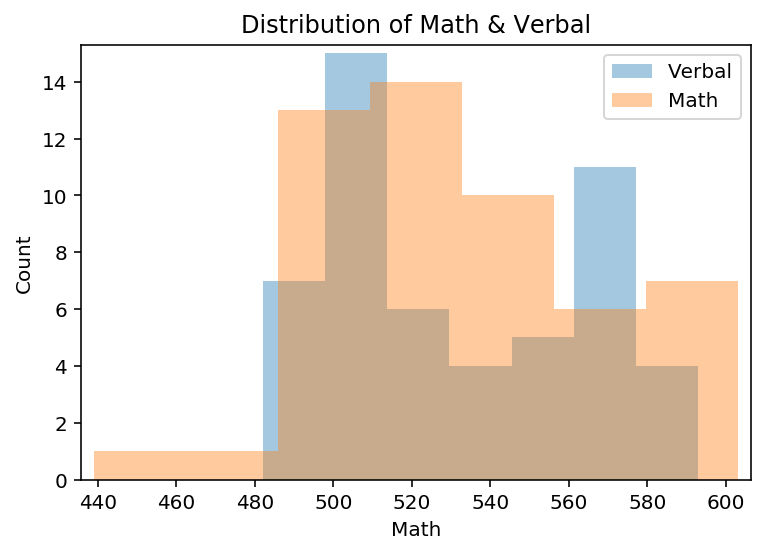

In [11]:
#Calculates the number of bins using the sqrt of the sample size: bins
bins = int(np.floor(np.sqrt(len(sat_frompd))))

#Plots the histogram of the rate of participation for US states in SAT
sns.distplot(sat_frompd['Rate'], bins = bins, kde = False)

_ = plt.title("Distribution of Rate")
_ = plt.ylabel("Count")

_ = plt.margins(0.02)

_ = plt.show()

print("-----------------------------------------------------------------")

#Plots the histogram of the scores of participants for the subjects of Maths and Vebal
sns.distplot(sat_frompd['Verbal'], bins = bins, kde = False)
sns.distplot(sat_frompd['Math'], bins = bins, kde = False)
_ = plt.title("Distribution of Math & Verbal")
_ = plt.ylabel("Count")

_ = plt.legend(["Verbal", "Math"])
_ = plt.margins(0.02)

_ = plt.show()


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<font color = "red">
**Insights**

<br></br>
<br></br>

The below charts illustrate several interesting points about the Math, Verbal and Rate variables.
<br></br>
<br></br>
1) The distribution of the rates of US states is bimodal with a clear separation between low rates of participation and high rates of participation. This may be reflective of the seperation between the wealthier states of America and the less wealthy states. Hinting towards a distribution of wealth problem
<br></br>
<br></br>
2) Unsuprisingly there is a strong linear correlation between Maths and Verbal indicating that success in one subject is not independant to success in the other, but rather intelligence as a whole.
<br></br>
<br></br>
3) More suprisingly is the negative correlational relationship between Math/Verbal and Rate scores. At first glance this suggests that within states that have overall high scores in the tests(wealthier states), there is a much lower participation rate. Whereas within states where there is a lower performance in the tests (poorer states) there is a much higher participation. Considering that the SAT is non-compulsory, it would by logical sense mean that poorer states would have lower participation
<br></br>
After some research, it appears that students in wealthier states undertake another test called the ACT instead of SAT, and only take SAT as a backup.


</font>

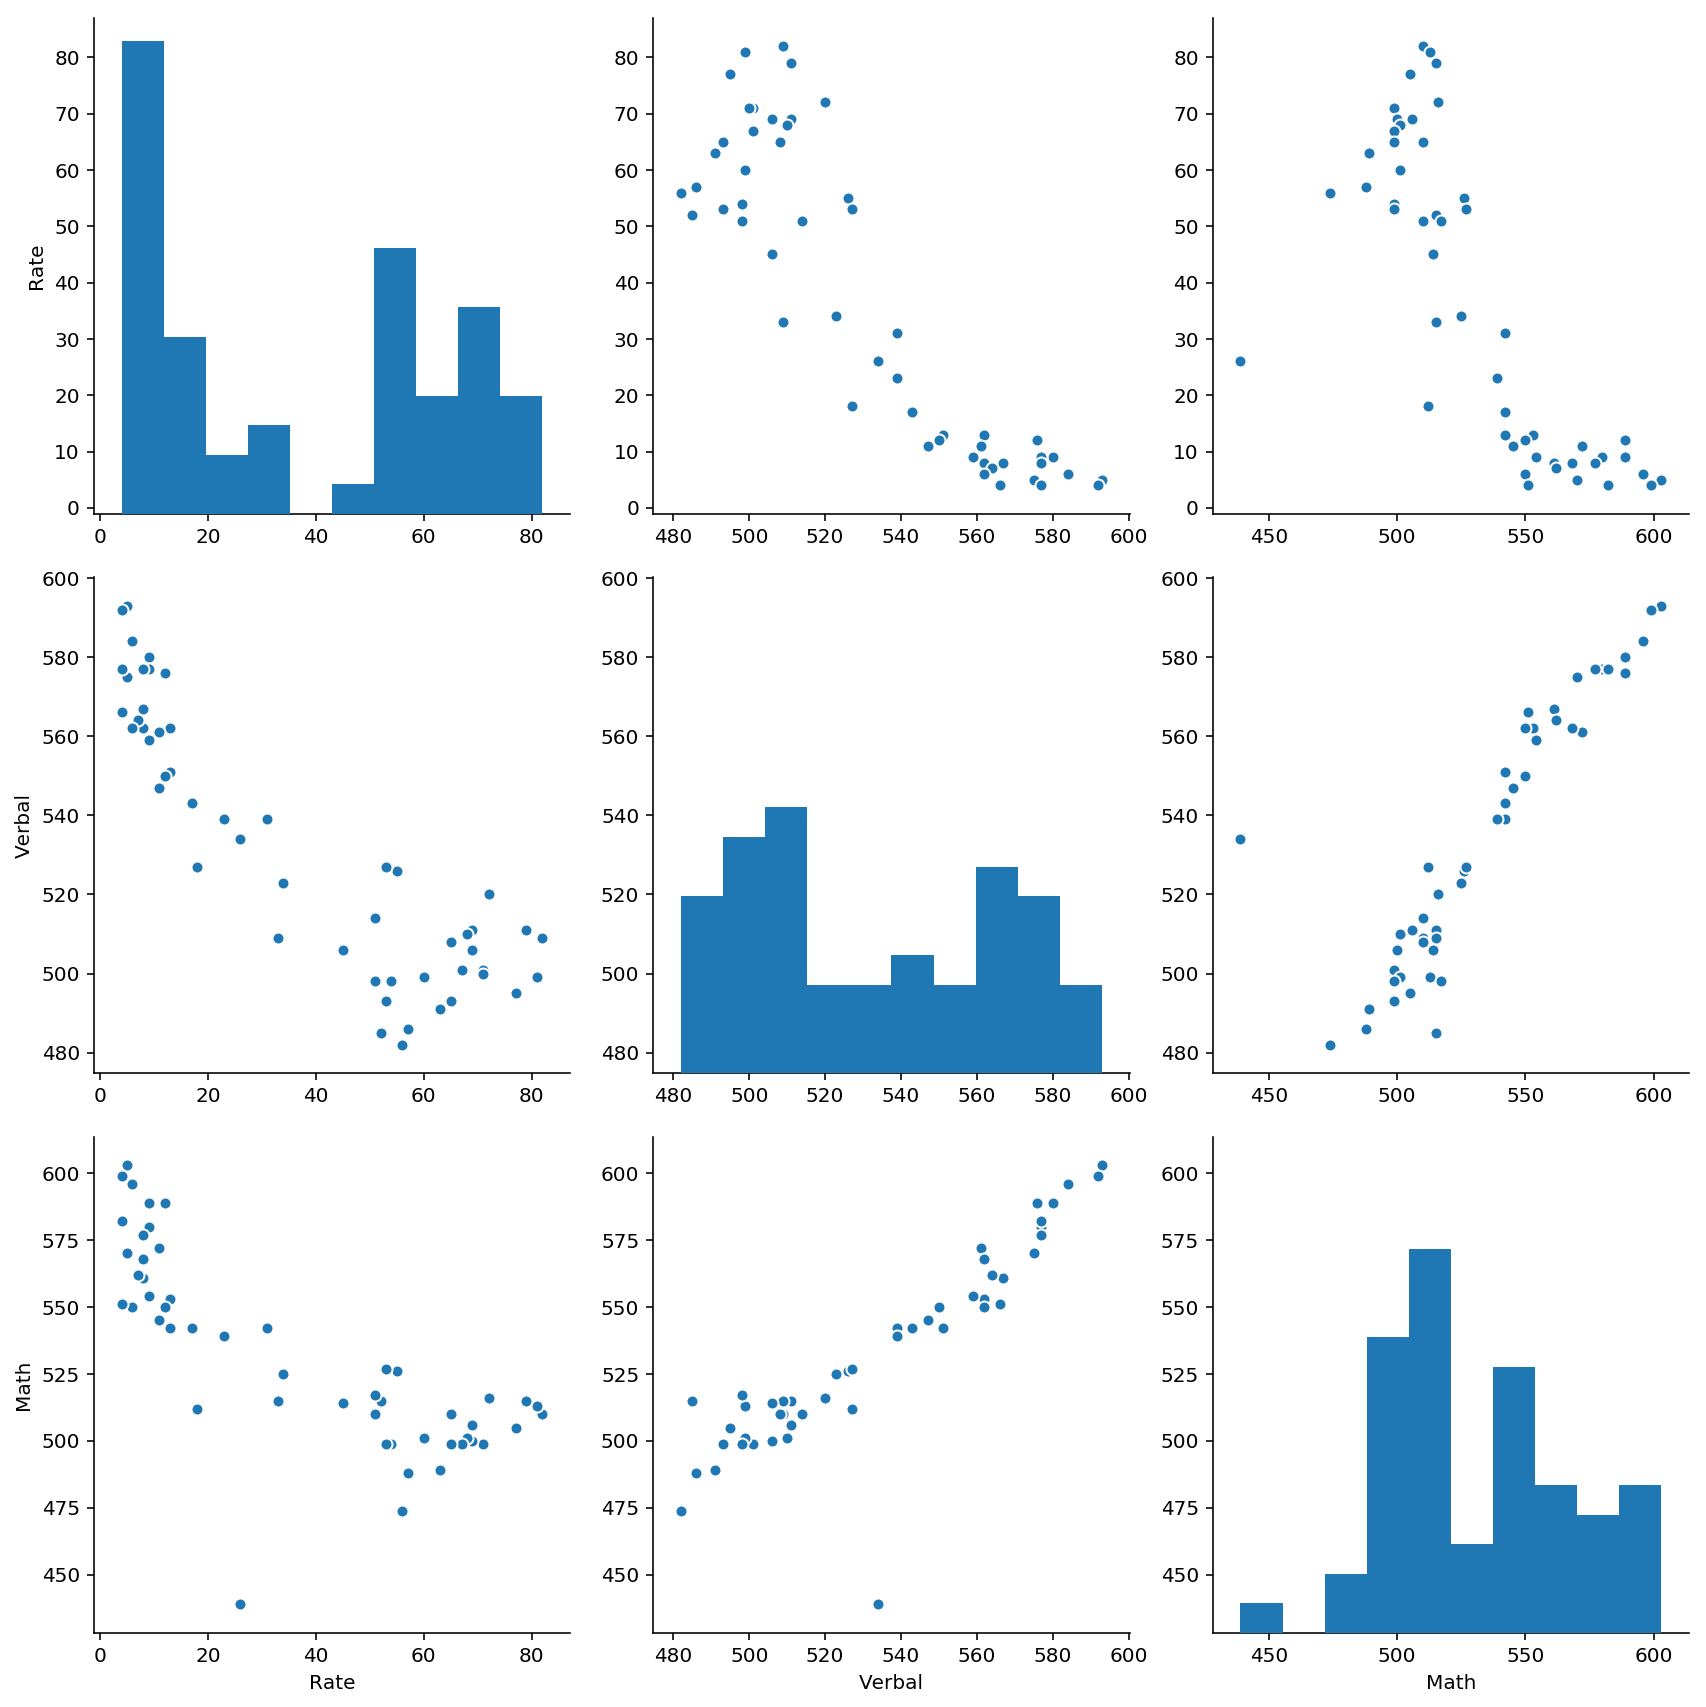

In [12]:
#Seaborn Pairplot for Verbal, Maths and Rate
g = sns.pairplot(sat_frompd, size = 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

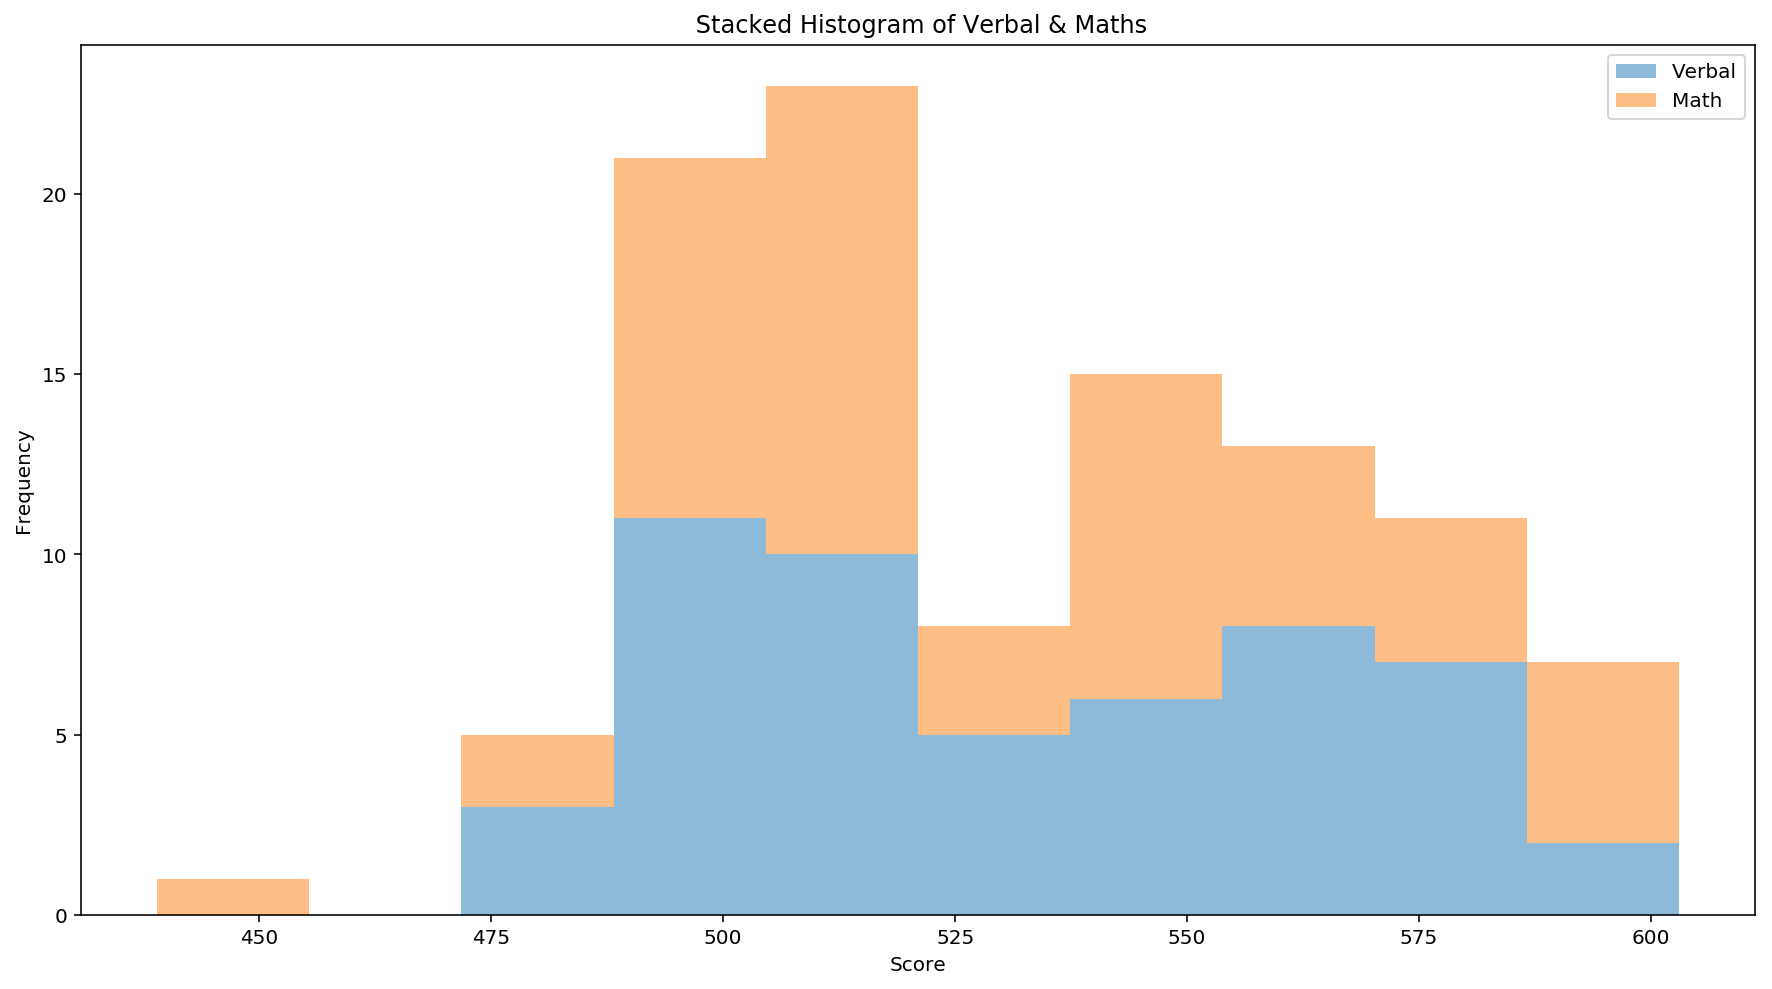

In [13]:
#Creates a DataFrame with the columns Verbal and Math: sat_vm 
sat_vm = sat_frompd.loc[:,'Verbal':'Math']


_ = plt.figure();
#Plots a stacked histogram of Verbal and Maths
_ = sat_vm.plot.hist(alpha=0.5, stacked = True, title = " Stacked Histogram of Verbal & Maths", figsize = (15,8))
_ = plt.xlabel("Score")
_ = plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

<font color = "red">

The benefit of using a boxplot instead of a scatterplot/histogram is that it removes the significance of individual values and is concerned solely on the distribution of values and where the majority of the values lie.

<br></br>

However unless we standardise the values of each variable it would distort the significance of the dataset towards the variable with a larger spread, making that variable appear more significant than it may actually be.

</font>

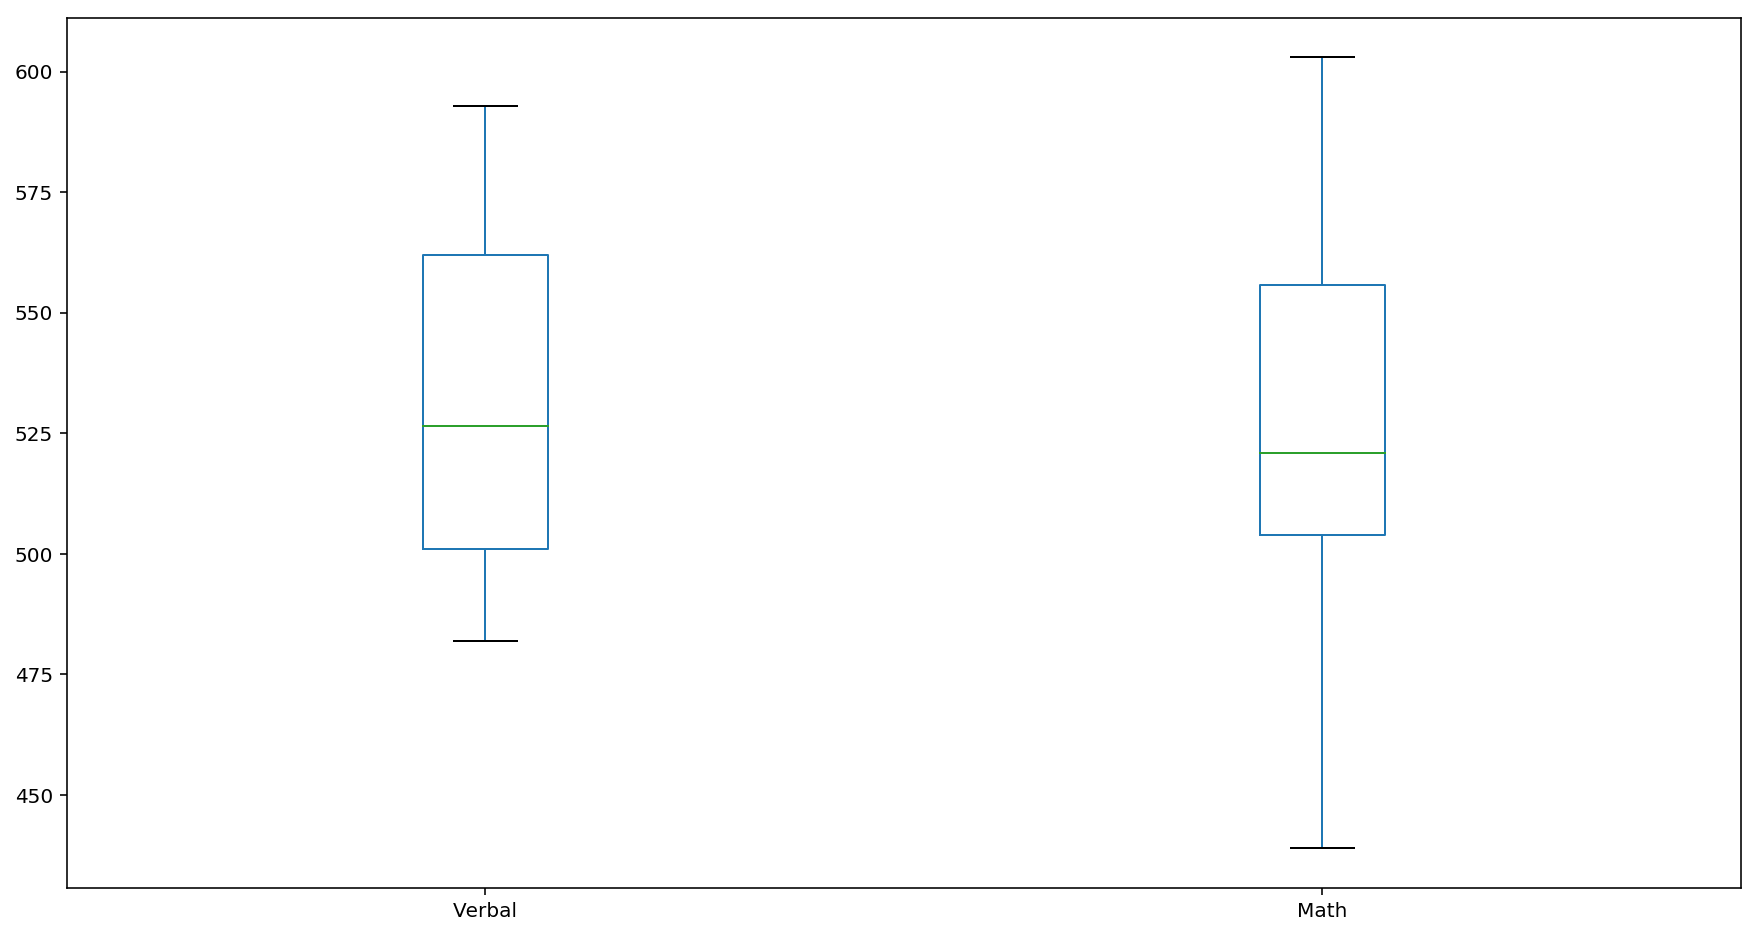

In [14]:
#Plots boxplots of Verbal and Maths.
_ = plt.figure();
_ = sat_vm.plot.box( figsize = (15,8));


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [15]:
#Removes the state and Diff columns because they were annoying me
try:
    sat_frompd.drop("State",axis = 1, inplace = True)
except ValueError:
    pass

try:
    sat_frompd.drop("Diff",axis = 1, inplace = True)
except ValueError:
    pass

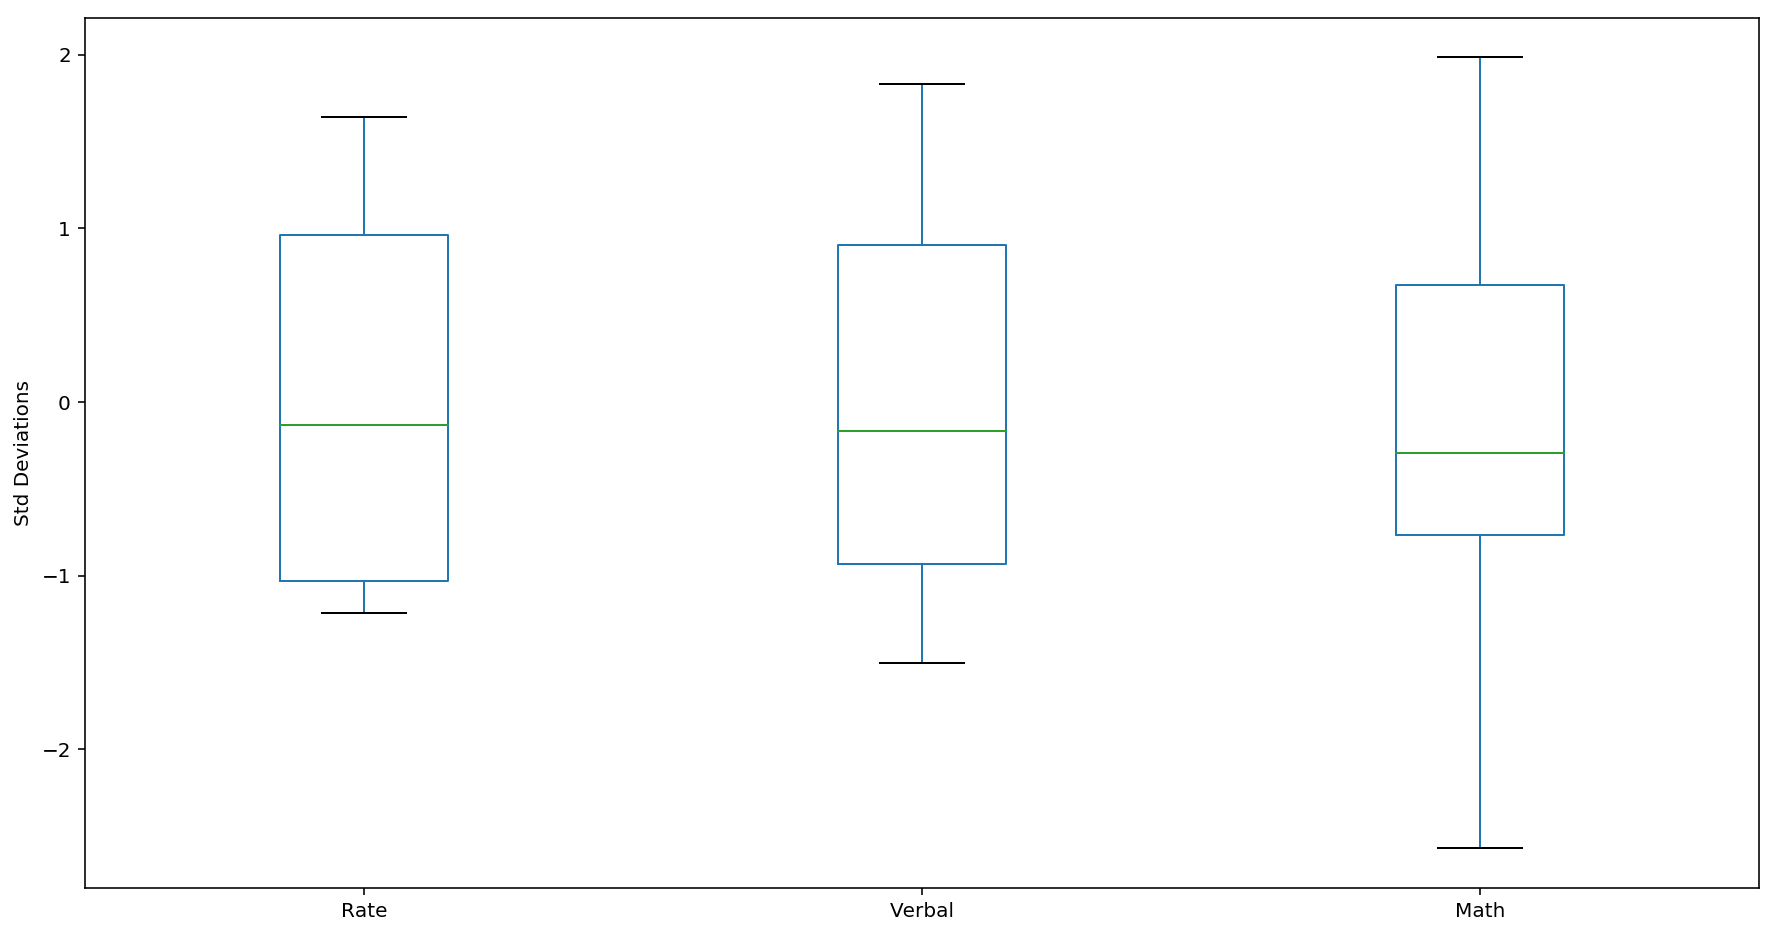

In [16]:
#Standardises the rate, verbal and maths columns using Gaussian standardisation for comparison:sat_stand
sat_stand = (sat_frompd - sat_frompd.mean())/sat_frompd.std()

#Plots rate, verbal, math on the same boxplot after standardising
_ = plt.figure();

_ = sat_stand.plot.box(figsize = (15,8));
_ = plt.ylabel("Std Deviations")

_ = plt.show();

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
#Calculates the mean of the Verbal Column: verbal_avg
verbal_avg = sat_frompd["Verbal"].mean()

#Filters the rows to only include values greater than the verbal average: verb_abvavg
verb_abvavg = sat_frompd[sat_frompd["Verbal"]>verbal_avg]

#Counts the number of states that satifies this conditon
print("There are {} states that have a verbal score above the mean.".format(verb_abvavg['Verbal'].count()))


There are 24 states that have a verbal score above the mean.


<font color="red">
There are 24 states that have 'Verbal' scores greater than the mean out of a total of 52.
This indicates that there is a negative bias in the distribution of the data (negatively skewed).
</font>

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
##Calculates the median of the Verbal Column: verbal_med
verbal_med = sat_frompd["Verbal"].median()

#Filters the rows to only include values greater than the verbal median: verb_abvmed
verb_abvmed = sat_frompd[sat_frompd["Verbal"]>verbal_med]
print("There are {} states that have a verbal score above the median".format(verb_abvmed.count()))


There are Rate      26
Verbal    26
Math      26
dtype: int64 states that have a verbal score above the median


<font color = "red">
Not suprisingly, half of the states have a greater value compared to the median. This is greater than the 24 states higher than the mean due to a negative skew of the dataset as previously discussed.
</font>

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
#Prepares a new dataframe to calculate differences: sat_diff
sat_diff = sat_frompd

#Creates a new column that is the difference between 'Verbal' and 'Math': sat_diff['Diff']
sat_diff["Diff"] = sat_frompd["Verbal"]-sat_frompd["Math"]

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
#Sorted accorting to to difference between Verbal and Maths: sat_vsorted
sat_vsorted = sat_diff.sort_values(by="Diff", ascending=False)

#Selects the 10 states with the highest difference between Verbal and Math and prints the highest 3:sat_vhigh
sat_vhigh = sat_vsorted.iloc[0:11,:]
print("The 3 states with highest verbal-math scores")
print(sat_vhigh.head(3))

print("-----------------------------------------------------")

#Sorted accorting to to difference between Verbal and Maths: sat_vsorted
sat_msorted = sat_diff.sort_values(by="Diff", ascending=True)
#Selects the 10 states with the highest difference between Verbal and Math and prints the highest 3:sat_vhigh
sat_mhigh = sat_msorted.iloc[0:11,:]
print("The 3 states with highest math-verbal scores")
print(sat_mhigh.head(3))


The 3 states with highest verbal-math scores
       Rate  Verbal  Math  Diff
State                          
OH       26     534   439    95
MS        4     566   551    15
WV       18     527   512    15
-----------------------------------------------------
The 3 states with highest math-verbal scores
       Rate  Verbal  Math  Diff
State                          
HI       52     485   515   -30
CA       51     498   517   -19
NJ       81     499   513   -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


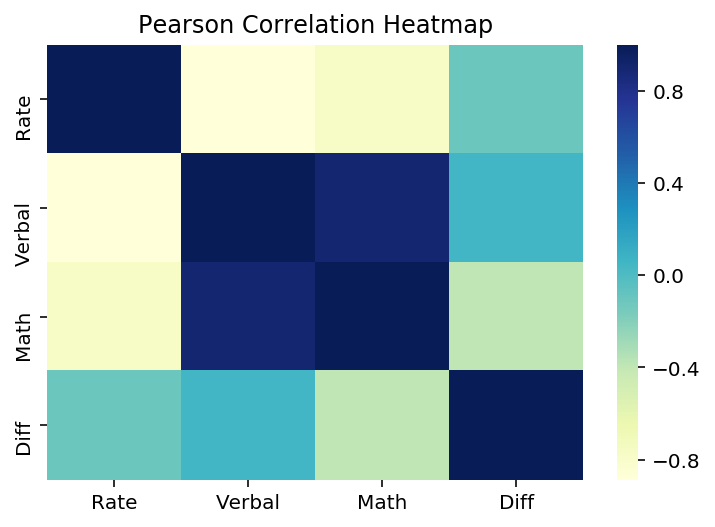

In [21]:
sat_frompd.corr()

# calculate the correlation matrix
corr = sat_frompd.corr()
_ = plt.title("Pearson Correlation Heatmap")

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="YlGnBu")

<font color="red">
As discussed earlier there is a positive correlation between Maths and Verbal which is unsuprising, and a strong negative correlation between rate and Verbal/Maths which can be attributed to the existence of the ACT.
</font>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
"""
count - Returns the frequency of the distribution
mean - Returns the average of all numerics within the column
std - Returns the spread (Standard Deviation) of the values in the column. Denoted by the square root of the variance.
min - Returns the smallest value within the column
25% - Returns the value at the 25th percentile in the column
50% - Returns the value at the 50th percentile in the column
75% - Returns the value at the 75% percentile in the column
max - Returns the largest value within the column
"""

sat_frompd.describe()

,Rate,Verbal,Math,Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<font color = "red">

The Correlation Matrix is defined by the product between two standard deviations divided by their respective covariance. This creates the difference between the two which is that Correlation is Standardized whereas Covariance is not.
<br></br>
Lending to the preference of using correlation over covariance

</font>


In [23]:
sat_frompd.cov()

,Rate,Verbal,Math,Diff
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Diff,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1
Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [24]:
#Initiates the file name: file_name
file_name = "drug-use-by-age.csv"

#Reads the data into a DataFrame, initializing age as index: drug_pd
drug_pd = pd.read_csv(file_name)

<font color="red">
By viewing the data types of the variables in the data set we can infer from the columns of "object" type that there are
values that are non-numeric. Upon further observation, we can see that the "-" values are causing the types of the columns
to be classified as an 'object' type. The data will have to be re imported with - values converted to np.nan, and age will be used as the index
</font>

In [25]:
#Imports the clean dataset with np.nan values replacing missing and age as the index: drug_clean
drug_clean = pd.read_csv(file_name, na_values = "-", index_col = "age")

<font color="red">
After cleaning the dataset, it is clear that there are no more missing values as all columns have been imported as either float64s or int64s
</font>

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [26]:

drug_headers = [drug[:-4] for drug in list(drug_clean.columns)[1::2]]
adolescence = pd.DataFrame(drug_clean.iloc[:,0]) 
adolescence2 = drug_clean.iloc[:,1::2]
adolescence2.columns = [drug[:-4] for drug in list(drug_clean.columns)[1::2]]
drug_clean = pd.concat([adolescence, adolescence2], axis=1, join_axes=[adolescence.index])
def test1(x):
    return x * drug_clean['n']/100
def test2(x):
    return x * drug_clean['n']/100

drug_clean.iloc[:,1:] = drug_clean.iloc[:,1:].apply(test1)
drug_clean

,n,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-releiver,oxycontin,tranquilizer,stimulant,meth,sedative
age,,,,,,,,,,,,,,
12,2798,109.122,30.778,2.798,0.000,2.798,5.596,44.768,55.960,2.798,5.596,5.596,0.000,5.596
13,2757,234.345,93.738,2.757,0.000,0.000,16.542,68.925,66.168,2.757,8.271,8.271,2.757,2.757
14,2792,505.352,242.904,2.792,0.000,2.792,44.672,72.592,108.888,11.168,25.128,22.336,2.792,5.584
15,2956,863.152,428.620,14.780,2.956,5.912,62.076,73.900,162.580,23.648,59.120,44.340,8.868,11.824
16,3058,1226.258,688.050,30.580,0.000,3.058,103.972,91.740,189.596,33.638,73.392,55.044,9.174,6.116
17,3038,1497.734,850.640,60.760,3.038,3.038,145.824,60.760,258.230,42.532,106.330,85.064,18.228,15.190
18,2469,1449.303,832.053,79.008,9.876,9.876,172.830,44.442,227.148,41.973,120.981,74.070,12.345,9.876
19,2223,1436.058,742.482,91.143,11.115,11.115,191.178,31.122,208.962,33.345,93.366,73.359,8.892,6.669
20,2271,1582.887,772.140,111.279,13.626,20.439,168.054,34.065,227.100,38.607,122.634,90.840,20.439,11.355


In [27]:
drug_clean.index = ["Teens"]*10 + ["Adult"]*5 + ["Elderly"]*2

try:
    drug_clean.reset_index(inplace = True)
except ValueError:
    pass

drug_num = drug_clean.groupby(by= "index").sum()
drug_num

,n,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-releiver,oxycontin,tranquilizer,stimulant,meth,sedative
index,,,,,,,,,,,,,,
Adult,22181,17662.061,4264.931,650.560,108.277,118.529,631.353,133.195,1581.412,219.187,758.430,433.704,102.385,62.737
Elderly,6371,3843.120,315.755,35.307,15.692,3.923,14.217,7.846,112.763,15.692,59.818,11.769,7.846,7.846
Teens,26716,10862.739,5458.225,508.889,52.381,73.152,1059.046,555.270,1716.492,261.068,706.624,555.434,97.619,82.029


In [28]:
def test2(x):
    return np.round(x/drug_num['n']*100, decimals = 2)

drug_num2 = drug_num.iloc[:,1:].apply(test2)
drug_num2 = drug_num.reindex(["Teens", "Adult", "Elderly"])

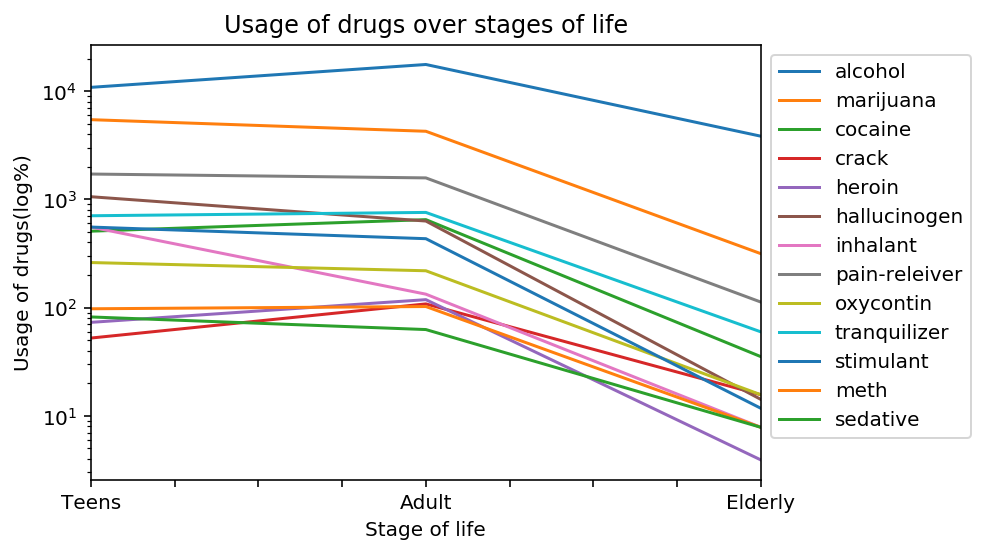

In [41]:
drug_num2.iloc[:,1:].plot(kind="line", logy = True)
_ = plt.title("Usage of drugs over stages of life")
_ = plt.xlabel("Stage of life")
_ = plt.ylabel("Usage of drugs(log%)")
_ = plt.legend(bbox_to_anchor=(1, 1))

<font color = "red">

**Findings**
<br></br>
<br></br>
From the line chart above we we can see that "Alchohol", "Marijuana", and "Pain-relievers" have a much larguer use between all stages of life compared to all other drugs. 
<br></br>
Hallucinogens and Inhalants have a more popular appeal towards younger age groups before rapidly dropping off for the elderly. 
<br></br>
Except for alchohol, the elderly population have a much lower rate of use compared to all other stages of life.

</font>

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Hypothesis: Adults use more drugs than teens and the elderly combined.

In [30]:
def test3(x):
    return np.round(x/drug_numt['n']*100, decimals = 2)

In [40]:
# Code

drug_numt = drug_num.T


drug_numt["Both"]  = drug_numt["Teens"] + drug_numt["Elderly"]

drug_numt = drug_numt.T
drug_numt2 = drug_numt.iloc[:,1:].apply(test3)
drug_numt2

,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-releiver,oxycontin,tranquilizer,stimulant,meth,sedative
index,,,,,,,,,,,,,
Adult,79.63,19.23,2.93,0.49,0.53,2.85,0.60,7.13,0.99,3.42,1.96,0.46,0.28
Elderly,60.32,4.96,0.55,0.25,0.06,0.22,0.12,1.77,0.25,0.94,0.18,0.12,0.12
Teens,40.66,20.43,1.90,0.20,0.27,3.96,2.08,6.42,0.98,2.64,2.08,0.37,0.31
Both,44.45,17.45,1.64,0.21,0.23,3.24,1.70,5.53,0.84,2.32,1.71,0.32,0.27


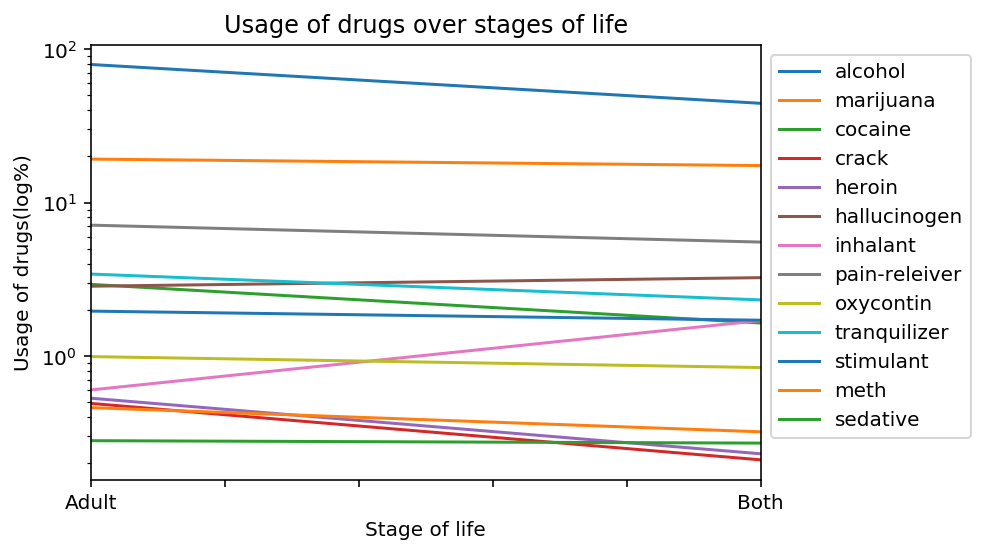

In [39]:
try:
    drug_numt2.drop("Elderly",inplace = True)
    drug_numt2.drop("Teens", inplace = True)
except:
    pass

drug_numt2.plot(kind="line", logy = True)
_ = plt.title("Usage of drugs over stages of life")
_ = plt.xlabel("Stage of life")
_ = plt.ylabel("Usage of drugs(log%)")
_ = plt.legend(bbox_to_anchor=(1, 1))


<font color = "red">
**Report**

Besides alchohol and inhalents there is insignifcant difference between the consumption of drugs by adults and by teens combined with the elderly
</font>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?


<font color = "red">
**Outliers**
<br></br>
Outliers are numerically defined by observations whose values either lie outside 1.5 IQRs from the median or lie outside 3 standard deviations away from the mean. By these definitions, the SAT dataset contains no outliers. So for the purpose of this exercise I am using Tukey's Fences method with a k coefficient of 0.5 to introduce outliers
</font>

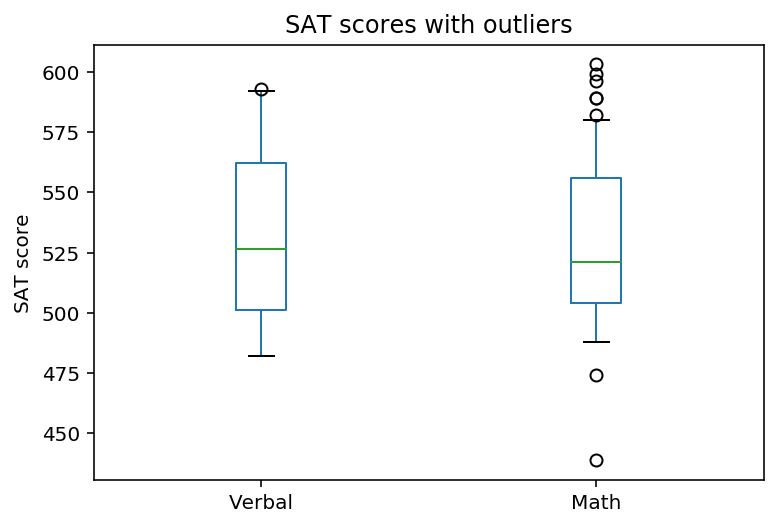

In [33]:
_ = plt.figure();

#Plots a boxplot of Verbal and Maths with outliers
_ = sat_vm.plot.box(whis = 0.5);
_ = plt.title("SAT scores with outliers")
_ = plt.ylabel("SAT score")
_ = plt.show()


In [34]:
#Initializes the IQR for Maths and Verbal for later use: iqr_math, iqr_verbal
iqr_math = sat_vm.Math.quantile(0.75) - sat_vm.Math.quantile(0.25)
iqr_verbal = sat_vm.Verbal.quantile(0.75) - sat_vm.Verbal.quantile(0.25)

#Creates Tukey's K coefficiont as 0.5
tukeys_coeff = 0.5


In [35]:
#Initializes the cutoff for outliers for maths: math_outliers_below, math_outliers_above
math_outliers_below = sat_vm['Math'].quantile(0.25) - tukeys_coeff * iqr_math 
math_outliers_above = sat_vm['Math'].quantile(0.75) + tukeys_coeff * iqr_math 

#Filters the DataFrame contingent on the outliers
sat_vm['Math'][(sat_vm['Math'] > math_outliers_above) | (sat_vm['Math'] < math_outliers_below)]

State
DC    474
OH    439
IL    589
MN    589
WI    596
IA    603
SD    582
ND    599
Name: Math, dtype: int64

In [36]:
#Initializes the cutoff for outliers for verbas: verbal_outliers_below, verbal_outliers_above
verbal_outliers_below = sat_vm['Verbal'].quantile(0.25) - tukeys_coeff * iqr_verbal
verbal_outliers_above = sat_vm['Verbal'].quantile(0.75) + tukeys_coeff * iqr_verbal

#Filters the DataFrame contingent on the outliers
sat_vm['Verbal'][(sat_vm['Verbal'] > verbal_outliers_above) | (sat_vm['Verbal'] < verbal_outliers_below)]

State
IA    593
Name: Verbal, dtype: int64

<font color="red">
There are 8 states that are considered outliers for maths under a 0.5 Tukey's Fences method.
<br></br>
There are 1 state that is considered an outlier for verbal under a 0.5 Tukey's Fences method.
</font>

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


<font color = "red">
The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. Spearman correlation is often used to evaluate relationships involving ordinal variables.
</font>

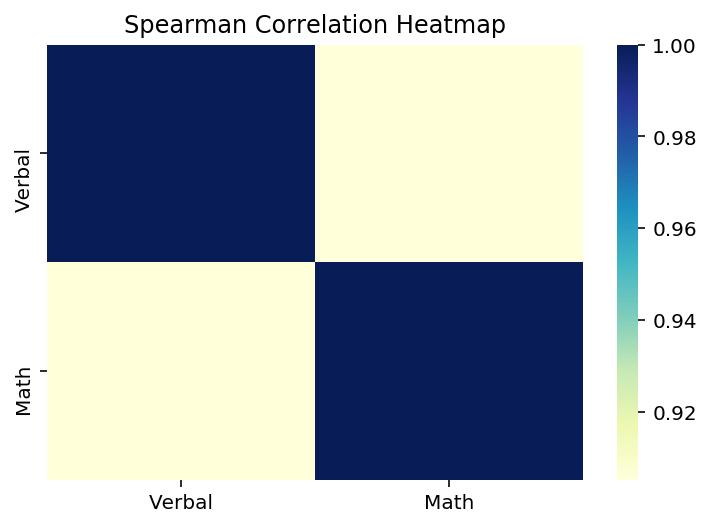

In [37]:
# calculate the correlation matrix
corr = sat_vm.corr(method="spearman")

_ = plt.title("Spearman Correlation Heatmap")

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="YlGnBu")

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

<font color = "red">
The percentile of california is 56.7308. The Spearman rank correlation uses the rank of each element in the list of values and calculates the correlation based on that.
</font>

In [60]:
def perc(x):
    return stats.percentileofscore(sat_frompd['Rate'],x)

rate = sat_frompd[['Rate']]
rate = rate.applymap(perc)
rate[rate.index == "CA"]


,Rate
State,
CA,56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

<font color = "red">
Percentile scoring has an advantage in dealing with outliers as it shows exactly at which percentile the value is at. When displayed on a boxplot this also visually shows where the main bulk of the data is located. 

<br></br>
<br></br>

As shown below plotting the percentile ranking puts more outliers by plotting them away from the center of the graph
</font>

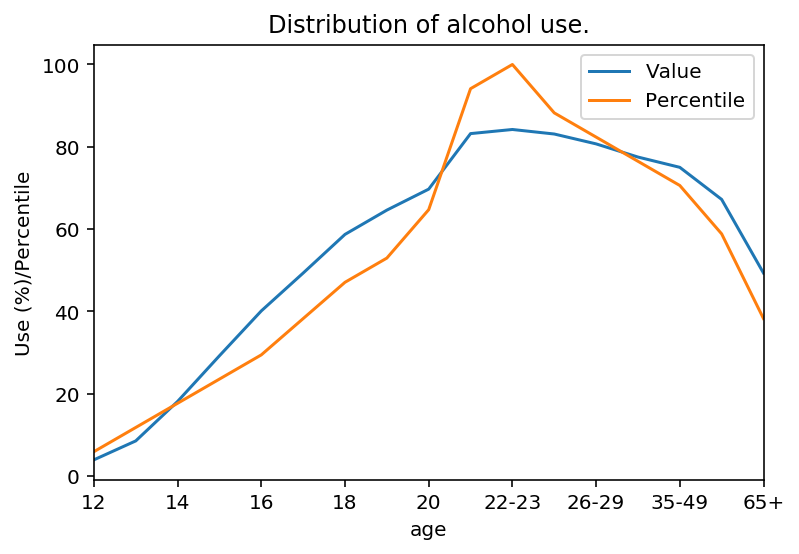

In [89]:
#Returns the percentile rank of each element
def perc(x):
    return stats.percentileofscore(drug_pd["alcohol-use"],x)

#Sets's age as the index of the DataFrame
try:
    drug_pd.set_index("age", inplace = True)
except KeyError:
    pass

_ = drug_pd["alcohol-use"].plot()

alch_use = drug_pd["alcohol-use"].map(perc)

_ = alch_use.plot()

_ = plt.title("Distribution of alcohol use.")
_ = plt.ylabel("Use (%)/Percentile")

_ = plt.legend(["Value","Percentile"])